 * Transform the json profiles into a csv or dataframe and provide exploratory analysis of the dataset.


In [1]:
# Importing Data Manipulation Libraries
import pandas as pd

In [2]:
#Reading the json file
data_df = pd.read_json('C:/Users/user/Downloads/customersdata.json',lines=True)


In [3]:
#Visualizing the Data
data_df.head()

,customer,fraudulent,orders,paymentMethods,transactions
0,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"{'customerEmail': 'andersonwilliam@yahoo.com',...",False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...",False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,"{'customerEmail': 'uchen@malone.com', 'custome...",True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


Since the data in each record for customer, orders, paymentMethods and transactions columns again form separate data, lets create table for each columns.

In [4]:
customer = []
orders = []
paymentMethods = []
transactions = []

for i in data_df.index:
    customer.append([
        i,
        data_df.loc[i]['fraudulent'],
        data_df['customer'][i]['customerEmail'],
        data_df['customer'][i]['customerPhone'],
        data_df['customer'][i]['customerDevice'],
        data_df['customer'][i]['customerIPAddress'],
        data_df['customer'][i]['customerBillingAddress']
    ])
    for j in range(len(data_df['orders'][i])):
        orders.append([
            i,
            data_df['orders'][i][j]['orderId'],
            data_df['orders'][i][j]['orderAmount'],
            data_df['orders'][i][j]['orderState'],
            data_df['orders'][i][j]['orderShippingAddress']
        ])
    for j in range(len(data_df['paymentMethods'][i])):
        paymentMethods.append([
            i,
            data_df['paymentMethods'][i][j]['paymentMethodId'],
            data_df['paymentMethods'][i][j]['paymentMethodRegistrationFailure'],
            data_df['paymentMethods'][i][j]['paymentMethodType'],
            data_df['paymentMethods'][i][j]['paymentMethodProvider'],
            data_df['paymentMethods'][i][j]['paymentMethodIssuer']
        ])
    for j in range(len(data_df['transactions'][i])):
        transactions.append([
            i,
            data_df['transactions'][i][j]['transactionId'],
            data_df['transactions'][i][j]['orderId'],
            data_df['transactions'][i][j]['paymentMethodId'],
            data_df['transactions'][i][j]['transactionAmount'],
            data_df['transactions'][i][j]['transactionFailed']
        ])
        
customers = pd.DataFrame(data=customer, columns=['customer_id', 'fraudulent', 'customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress'])
orders = pd.DataFrame(data=orders, columns=['customer_id', 'orderId', 'orderAmount', 'orderState', 'orderShippingAddress'])
paymentMethods = pd.DataFrame(data=paymentMethods, columns=['customer_id', 'paymentMethodId', 'paymentMethodRegistrationFailure', 'paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer'])
transactions = pd.DataFrame(data=transactions, columns=['customer_id', 'transactionId', 'orderId', 'paymentMethodId', 'transactionAmount', 'transactionFailed'])

In [5]:
#Customers DataFrame
customers

,customer_id,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."
5,5,True,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7..."
6,6,True,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325"
7,7,True,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074"
8,8,False,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661
9,9,True,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,..."


In [6]:
#Orders DataFrame
orders

,customer_id,orderId,orderAmount,orderState,orderShippingAddress
0,0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,0,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,1,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,1,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,1,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"
5,2,yk34y2,33,failed,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
6,2,28v6b0,24,fulfilled,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
7,2,itnk8y,25,fulfilled,"22396 Victor Lights\nCarsonstad, MO 93914"
8,3,fbz9ep,34,fulfilled,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
9,3,7odnn6,26,fulfilled,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."


In [7]:
#paymentMethods DataFrame
paymentMethods

,customer_id,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,1,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,1,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,1,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,1,m52tx8e1s,False,card,Mastercard,Vertex Bancorp
5,1,41ug157xz,False,bitcoin,American Express,Bastion Banks
6,1,4dpg5sx2b,False,card,Maestro,Her Majesty Trust
7,1,bcx9pa3wf,False,card,JCB 16 digit,Fountain Financial Inc.
8,2,8pneoi03z,False,card,JCB 16 digit,Bastion Banks
9,2,dluy3jka0,False,card,Discover,His Majesty Bank Corp.


In [8]:
#transactions DataFrame
transactions

,customer_id,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,0,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,0,y4wcv03i,yp6x27,wt07xm68b,26,False
2,1,5mi94sfw,nlghpa,41ug157xz,45,False
3,1,br8ba1nu,uw0eeb,41ug157xz,23,False
4,1,a33145ss,bn44oh,y3xp697jx,43,True
5,2,q3lyvbza,yk34y2,8pneoi03z,33,False
6,2,3alf9irw,28v6b0,8pneoi03z,24,True
7,2,69w9wymx,28v6b0,8pneoi03z,24,False
8,2,pegqc4ud,itnk8y,dluy3jka0,25,True
9,2,uo3slwh7,itnk8y,8pneoi03z,25,False


Step 1 of Option B in the Assignment is completed with reading the json file and converting it into DataFrame.

In [9]:
df1 = pd.merge(customers, orders, left_index = True, right_index = True, on = 'customer_id')
df1.head()

,customer_id,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [10]:
df1.shape

(168, 11)

In [11]:
df2 = pd.merge(df1, paymentMethods, left_index = True, right_index = True, on = 'customer_id')
df2.head()

,customer_id,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",m52tx8e1s,False,card,Mastercard,Vertex Bancorp


In [12]:
df2.shape

(168, 16)

In [13]:
df3 = pd.merge(df2, transactions, left_index = True, right_index = True, on = 'customer_id')
df3.head()

,customer_id,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId_x,orderAmount,orderState,...,paymentMethodId_x,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,orderId_y,paymentMethodId_y,transactionAmount,transactionFailed
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,...,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,yp6x27,26,fulfilled,...,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,y4wcv03i,yp6x27,wt07xm68b,26,False
2,2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",nlghpa,45,fulfilled,...,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp,5mi94sfw,nlghpa,41ug157xz,45,False
3,3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",uw0eeb,23,fulfilled,...,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,br8ba1nu,uw0eeb,41ug157xz,23,False
4,4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",bn44oh,43,fulfilled,...,m52tx8e1s,False,card,Mastercard,Vertex Bancorp,a33145ss,bn44oh,y3xp697jx,43,True


In [14]:
df3.shape

(168, 21)

In [15]:
df3.columns

Index(['customer_id', 'fraudulent', 'customerEmail', 'customerPhone',
       'customerDevice', 'customerIPAddress', 'customerBillingAddress',
       'orderId_x', 'orderAmount', 'orderState', 'orderShippingAddress',
       'paymentMethodId_x', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer',
       'transactionId', 'orderId_y', 'paymentMethodId_y', 'transactionAmount',
       'transactionFailed'],
      dtype='object')

In [57]:
df3.dtypes

customer_id                          int64
fraudulent                            bool
customerEmail                       object
customerPhone                       object
customerDevice                      object
customerIPAddress                   object
customerBillingAddress              object
orderId_x                           object
orderAmount                          int64
orderState                          object
orderShippingAddress                object
paymentMethodId_x                   object
paymentMethodRegistrationFailure      bool
paymentMethodType                   object
paymentMethodProvider               object
paymentMethodIssuer                 object
transactionId                       object
orderId_y                           object
paymentMethodId_y                   object
transactionAmount                    int64
transactionFailed                     bool
dtype: object

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df['fraudulent']=le.fit_transform(df['fraudulent'])

In [61]:
df['fraudulent'].value_counts()

False    107
True      61
Name: fraudulent, dtype: int64

In [62]:
df.isnull().sum()

fraudulent                          0
orderAmount                         0
orderState                          0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
paymentMethodIssuer                 0
transactionAmount                   0
transactionFailed                   0
dtype: int64

After joining the 4 tables, we see that there are no missing values present

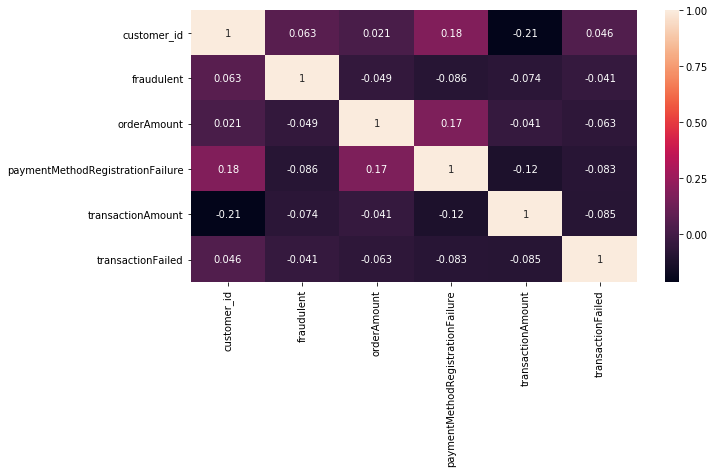

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True)

We see that there is no much correlation between the independent variables and the dependent variable

In [18]:
df = df3.drop(['customer_id', 'customerEmail','customerPhone','customerDevice', 'customerIPAddress',
               'customerBillingAddress', 'orderId_x', 'orderShippingAddress', 
               'paymentMethodId_x', 'transactionId', 'orderId_y', 'paymentMethodId_y' ],1)

In [59]:
df.head(2)

,fraudulent,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed
0,False,18,pending,True,card,JCB 16 digit,Citizens First Banks,18,False
1,True,26,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False


In [60]:
df.shape

(168, 9)

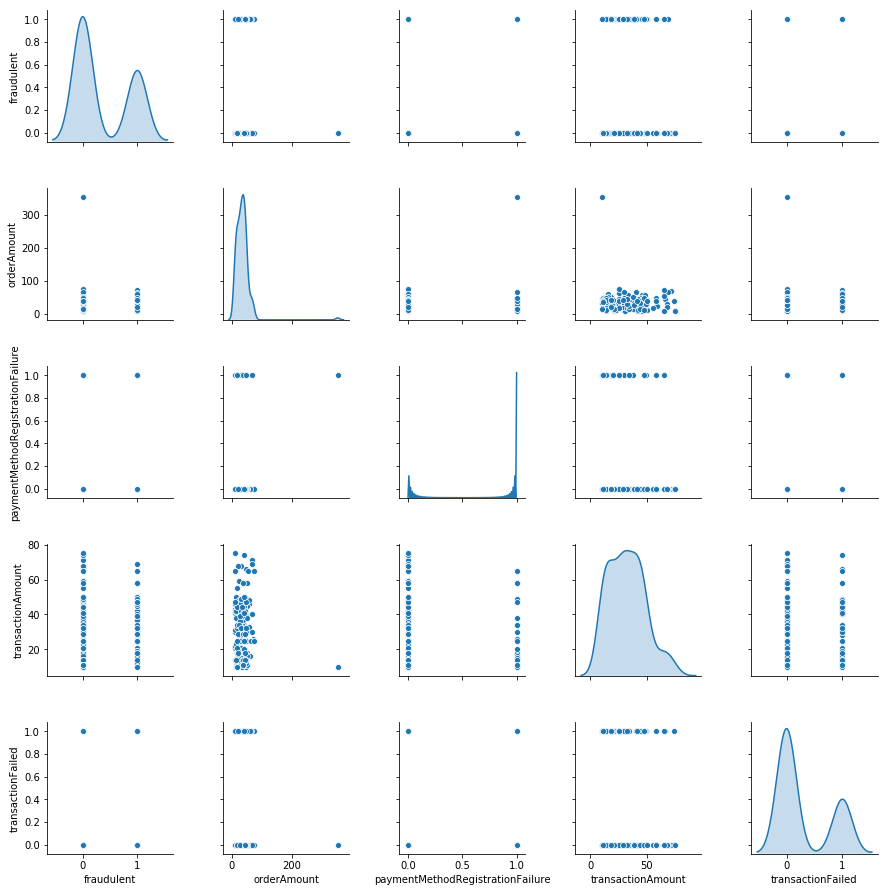

In [19]:
sns.pairplot(df, diag_kind='kde')

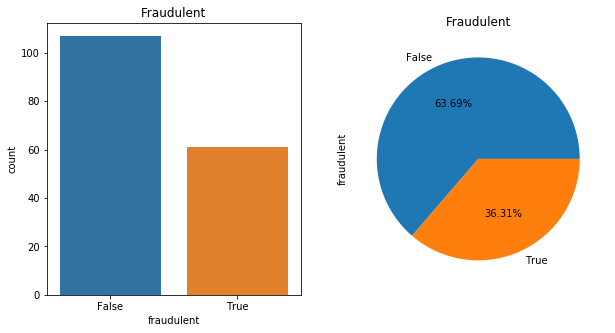

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='fraudulent',data=df,ax=axs[0])
axs[0].set_title("Fraudulent")
df.fraudulent.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Fraudulent")
plt.show()

We see that True class(whether a customer is fraud) present in the dataset is 36.31% and False(whether a customer is not fraud) is 63.69%

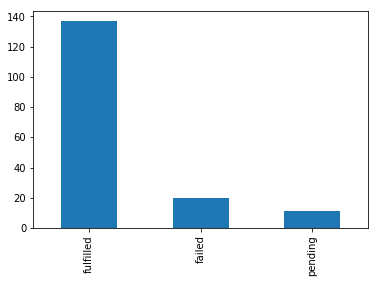

In [25]:
df['orderState'].value_counts().plot.bar()

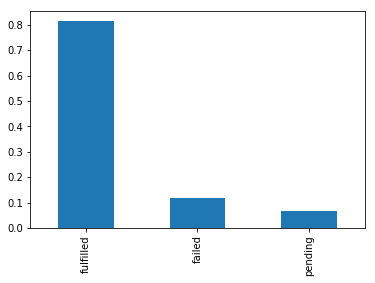

In [26]:
(df['orderState'].value_counts()/len(df)).plot.bar().annot=True

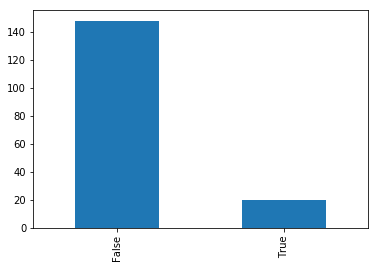

In [27]:
df['paymentMethodRegistrationFailure'].value_counts().plot.bar()

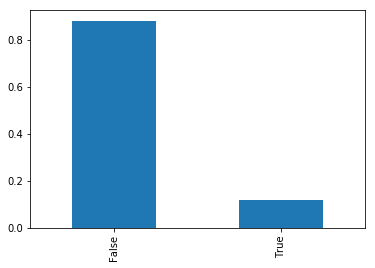

In [28]:
(df['paymentMethodRegistrationFailure'].value_counts()/len(df)).plot.bar()

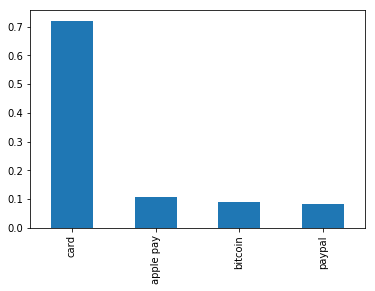

In [29]:
(df['paymentMethodType'].value_counts()/len(df)).plot.bar()

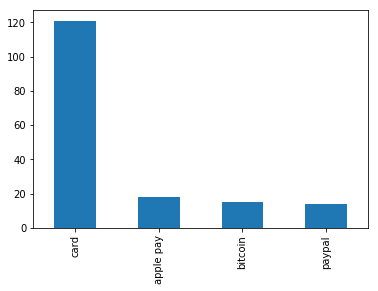

In [30]:
df['paymentMethodType'].value_counts().plot.bar()

#card payments are high in number when compared to applepay, bitcoin, paaypal

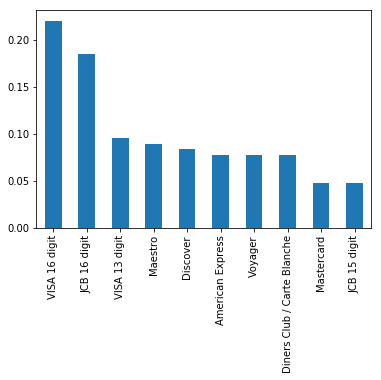

In [31]:
(df['paymentMethodProvider'].value_counts()/len(df)).plot.bar()

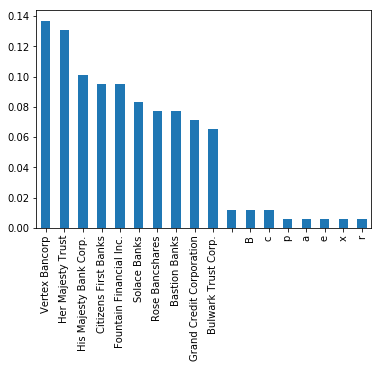

In [32]:
(df['paymentMethodIssuer'].value_counts()/len(df)).plot.bar()

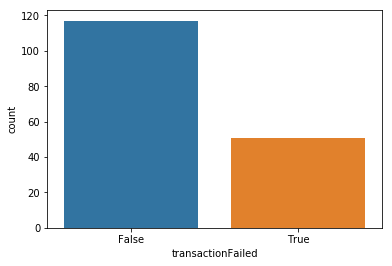

In [63]:
#(df['transactionFailed'].value_counts()/len(df)).plot.bar()
sns.countplot(x = 'transactionFailed', data = df)

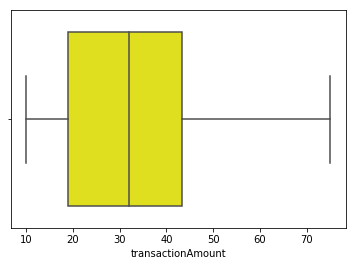

In [65]:
sns.boxplot(df['transactionAmount'], color = "yellow", orient = "h")
#There are no outliers present in transaction amount

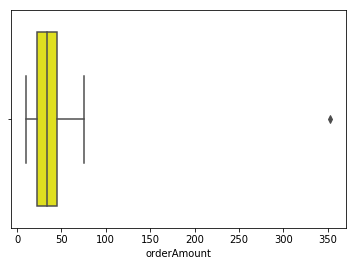

In [66]:
sns.boxplot(df['orderAmount'], color = "yellow", orient = "h")
#We see that there is an outlier in orderAmount variable

[]

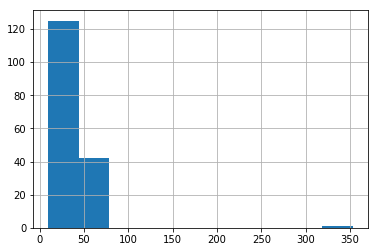

In [67]:
df.orderAmount.hist()
plt.plot()

[]

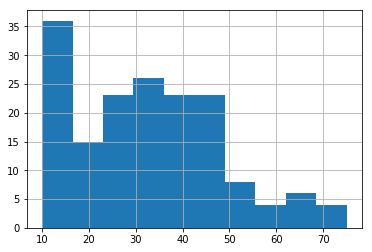

In [46]:
df.transactionAmount.hist()
plt.plot()

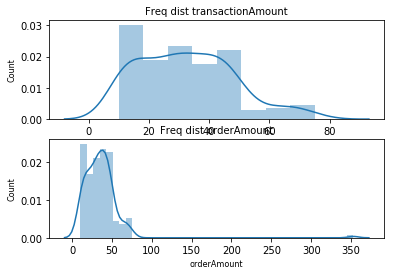

In [43]:
col_names = ['transactionAmount','orderAmount']

fig, ax = plt.subplots(len(col_names), figsize=(6,4))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

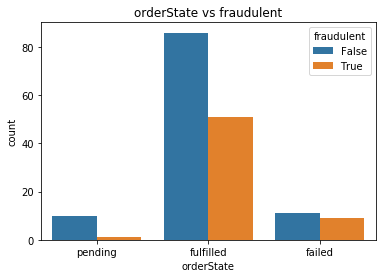

In [45]:
fig=plt.figure(figsize=(6,4))
sns.countplot(x='orderState',data=df,hue='fraudulent')
plt.title('orderState vs fraudulent')
plt.show()

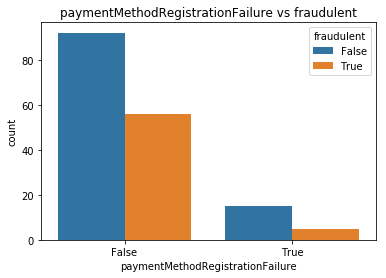

In [40]:
fig=plt.figure(figsize=(6,4))
sns.countplot(x='paymentMethodRegistrationFailure',data=df,hue='fraudulent')
plt.title('paymentMethodRegistrationFailure vs fraudulent')
plt.show()

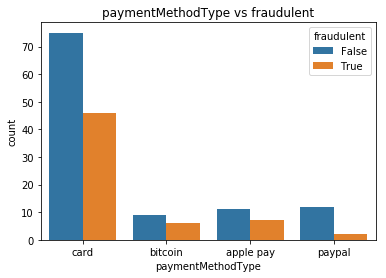

In [39]:
fig=plt.figure(figsize=(6,4))
sns.countplot(x='paymentMethodType',data=df,hue='fraudulent')
plt.title('paymentMethodType vs fraudulent')
plt.show()

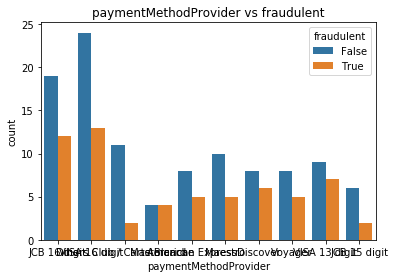

In [49]:
fig=plt.figure(figsize=(6,4))
sns.countplot(x='paymentMethodProvider',data=df,hue='fraudulent')
plt.title('paymentMethodProvider vs fraudulent')
plt.show()

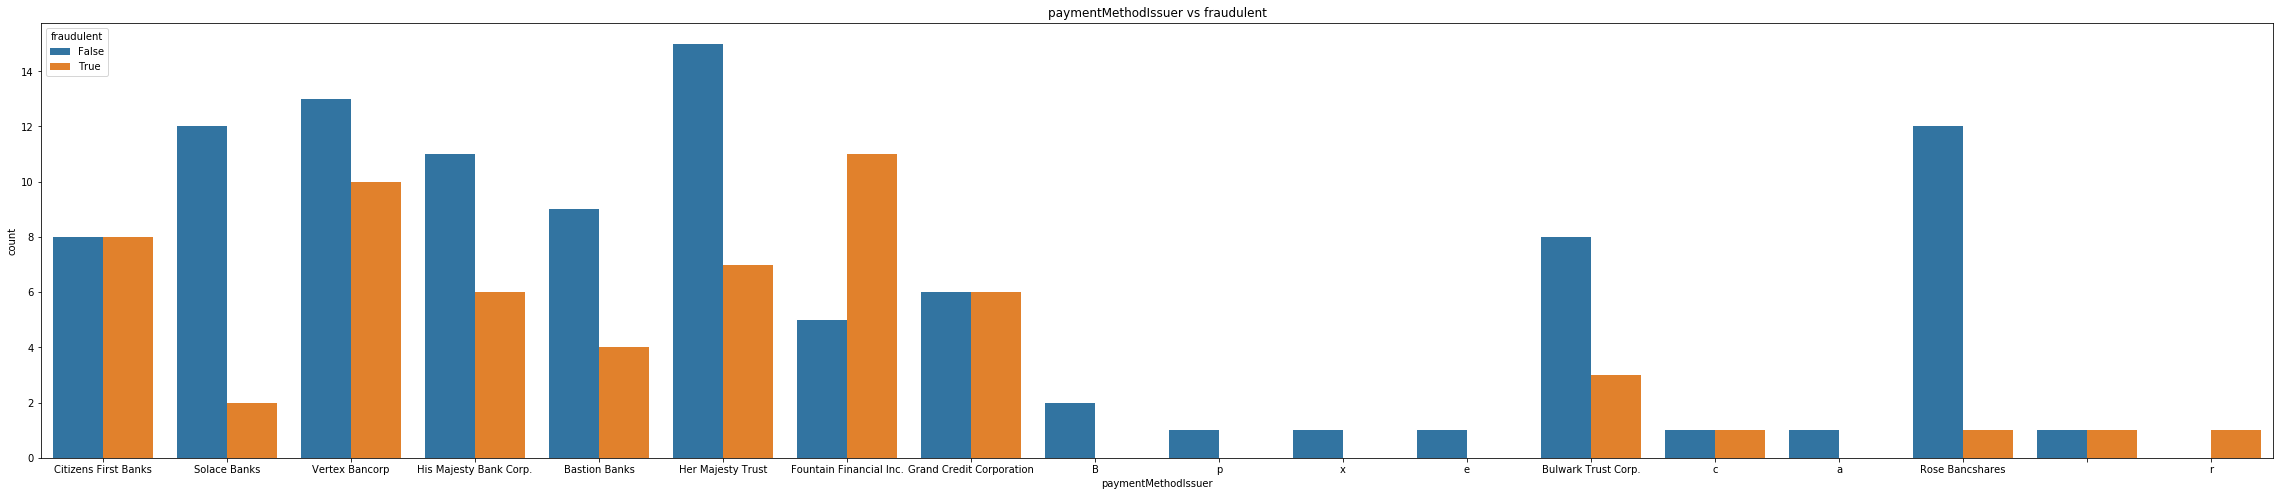

In [56]:
fig=plt.figure(figsize=(40,8))
sns.countplot(x='paymentMethodIssuer',data=df,hue='fraudulent')
plt.title('paymentMethodIssuer vs fraudulent')
plt.show()

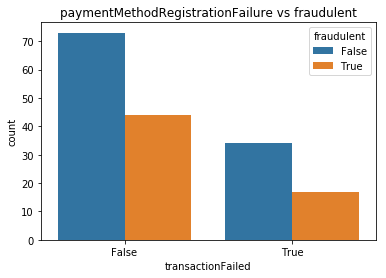

In [36]:
fig=plt.figure(figsize=(6,4))
sns.countplot(x='transactionFailed',data=df,hue='fraudulent')
plt.title('paymentMethodRegistrationFailure vs fraudulent')
plt.show()

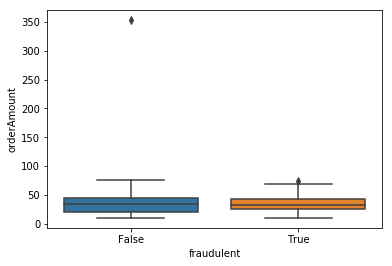

In [41]:
#fig,axes=plt.subplot(figsize=(15,6))
sns.boxplot(y='orderAmount',data=df,x='fraudulent')
plt.show()

 * Explain what factors you think are significant and insignificant in contributing to fraud
>> Factors that that are significant in contributing to fraud are:
Orderstate: Orderstate failed has less number of cases when compared to fulfilled but we see that if the orderstate is failed, there is a high chance that the transaction goes fraud when compared to fulfilled.

>> paymentMethodType: is one of the other significant factors. Payments made using card, applepay and bitcoin are most likely to get fraud. 

>> paymentMethodProvider: For the payment provider Club/ Carte, fraud rate is less when compared to the other providers

>> paymentMethodIssuer: is one of the other significant factors. Payments made through the issuer Fountain Financial Inc has highest chance of fraudulent payment.

> The factors that are insignificant in contributing to fraud are:
customer_id, customerEmail, customerPhone, customerDevice, customerIPAddress, customerBillingAddress, orderId_x,  orderShippingAddress, paymentMethodId_x, transactionId, orderId_y, paymentMethodId_y

>> The above factors are unique and they do not contribute in finding if a customer is fraud or not

>> We can convert the object variables using OneHot Encoding or Label Encoding or using manual replace function.